<a href="https://colab.research.google.com/github/ehhtisham/mind-the-map/blob/main/Mind_the_Map.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***Solution Background Rationale***

Selected Public Transport Network: **London Overground Lines within Zone 1-3**

| Line Name | Stations |
|---|---|
| North London Line | Stratford, Hackney Wick, Homerton, Hackney Central, Dalston Kingsland, Canonbury, Highbury & Islington, Caledonian Road & Barnsbury, Camden Road, Kentish Town West, Gospel Oak, Hampstead Heath, Finchley Road & Frognal, West Hampstead, Brondesbury, Kilburn High Road, Queen's Park, Kensal Rise, Willesden Junction |
| East London Line | Highbury & Islington, Canonbury, Dalston Junction, Haggerston, Hoxton, Shoreditch High Street, Whitechapel, Shadwell, Wapping, Rotherhithe, Canada Water, Surrey Quays, New Cross, New Cross Gate, Brockley, Honor Oak Park, Forest Hill, Sydenham, Crystal Palace |
| West London Line | Shepherd’s Bush, Kensington (Olympia), West Brompton, Imperial Wharf, Clapham Junction, Willesden Junction |
| South London Line | Clapham Junction, Wandsworth Road, Clapham High Street, Denmark Hill, Peckham Rye, Queens Road Peckham, Surrey Quays, Canada Water |
| Gospel Oak to Barking Line | Gospel Oak, Hampstead Heath, Finchley Road & Frognal, West Hampstead, Brondesbury Park, Kensal Rise, Willesden Junction |
| Watford DC Line | Queen’s Park, Kensal Green, Willesden Junction, Harlesden |

**1. Shared Stations:**

- Shared stations like **Highbury & Islington**, **Willesden Junction**, **Canada Water**, and **Gospel Oak** connect multiple lines. These are vital nodes for maintaining the connectivity of the graph.

**2. Zone Constraints:**

- The network is limited to **Zones 1-3** for simplicity, omitting stations outside this range.

**3. Simplified Approach for Task:**

- **Main Routes:** We use a simplified version of the Overground lines, focusing on their major stations within Zones 1-3.

- **Naming Conventions:** Lines are identified by their commonly recognized names (e.g., North London Line, East London Line).

- **Necessary Complexity:** Shared stations are retained to ensure that the network structure remains realistic and fully connected.


This approach balances simplicity and complexity, keeping the network adequate for visualization and graph-based analysis.

***Code Implementation***

**Setting Up the Graph**

We use networkx to represent the London Overground network as a graph. The stations are nodes, and the connections between them are edges. Shared stations are treated as nodes with *multiple associated lines*.

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Initialize the graph
G = nx.Graph()

# Define Overground lines and their properties
lines = {
    "North London Line": {
        "color": "orange",
        "stations": [
            "Stratford", "Hackney Wick", "Homerton", "Hackney Central",
            "Dalston Kingsland", "Canonbury", "Highbury & Islington",
            "Caledonian Road & Barnsbury", "Camden Road", "Kentish Town West",
            "Gospel Oak", "Hampstead Heath", "Finchley Road & Frognal",
            "West Hampstead", "Brondesbury", "Kilburn High Road", "Queen's Park",
            "Kensal Rise", "Willesden Junction"
        ],
    },
    "East London Line": {
        "color": "teal",
        "stations": [
            "Highbury & Islington", "Canonbury", "Dalston Junction", "Haggerston",
            "Hoxton", "Shoreditch High Street", "Whitechapel", "Shadwell",
            "Wapping", "Rotherhithe", "Canada Water", "Surrey Quays",
            "New Cross", "New Cross Gate", "Brockley", "Honor Oak Park",
            "Forest Hill", "Sydenham", "Crystal Palace"
        ],
    },
    "West London Line": {
        "color": "red",
        "stations": [
            "Shepherd’s Bush", "Kensington (Olympia)", "West Brompton",
            "Imperial Wharf", "Clapham Junction", "Willesden Junction"
        ],
    },
    "South London Line": {
        "color": "lightblue",
        "stations": [
            "Clapham Junction", "Wandsworth Road", "Clapham High Street",
            "Denmark Hill", "Peckham Rye", "Queens Road Peckham", "Surrey Quays",
            "Canada Water"
        ],
    },
    "Gospel Oak to Barking Line": {
        "color": "pink",
        "stations": [
            "Gospel Oak", "Hampstead Heath", "Finchley Road & Frognal",
            "West Hampstead", "Brondesbury Park", "Kensal Rise", "Willesden Junction"
        ],
    },
    "Watford DC Line": {
        "color": "green",
        "stations": [
             "Kensal Green", "Willesden Junction", "Harlesden"
        ],
    }
}


**Adding Nodes and Edges**

We iterate through the lines, adding stations as nodes and connections as edges. Shared stations are initialized to include all relevant lines in their attributes.

Strategy for Shared Stations:

- Identification: A station that appears in multiple lines is treated as a shared node.

- Attributes: A set is maintained for each node to store associated lines.
- Color Representation: Shared stations are given a distinct color to differentiate them in the visualization.

In [ ]:
# Step 1: Add stations and initialize their attributes
for line_name, line_data in lines.items():
    stations = line_data["stations"]
    color = line_data["color"]

    # Add edges between consecutive stations
    for i in range(len(stations) - 1):
        G.add_edge(stations[i], stations[i + 1], color=color, line=line_name)

    # Add nodes with initial attributes
    for station in stations:
        if station not in G.nodes:
            # New station: initialize with its line color and line set
            G.add_node(station, color=color, lines={line_name})
        else:
            # Update attributes for an already-added station
            # Check if 'lines' key exists before adding to it
            if 'lines' not in G.nodes[station]:
                G.nodes[station]['lines'] = {line_name} # Create the 'lines' set if it doesn't exist
            else:
                G.nodes[station]["lines"].add(line_name)

# Step 2: Update colors for shared stations (post-processing)
for station in G.nodes:
    if len(G.nodes[station]["lines"]) > 1:  # Shared station
        G.nodes[station]["color"] = "yellow"  # Mark shared
    else:
        # Assign color based on the single line the station belongs to
        line_name = list(G.nodes[station]["lines"])[0]
        G.nodes[station]["color"] = lines[line_name]["color"]

**Setting Node and Edge Colors**

To visualize the network:

- **Node Colors**:
  - Yellow: Shared stations.
  - Line-specific colors for other stations.
  
- **Edge Colors**: Color-coded by line.

In [ ]:
# Assign colors to nodes
node_colors = []
for node in G.nodes:
    if G.nodes[node]["color"] == "yellow":
        node_colors.append("yellow")  # Shared stations
    else:
        node_colors.append(G.nodes[node]["color"])  # Line color

# Assign colors to edges
edge_colors = [G[u][v]["color"] for u, v in G.edges]


**Visualizing the Graph**

We use `matplotlib` and `networkx` to plot the graph:

- **Layout**: Spring layout for a visually clear arrangement.
- **Labels**: Station names and line colors

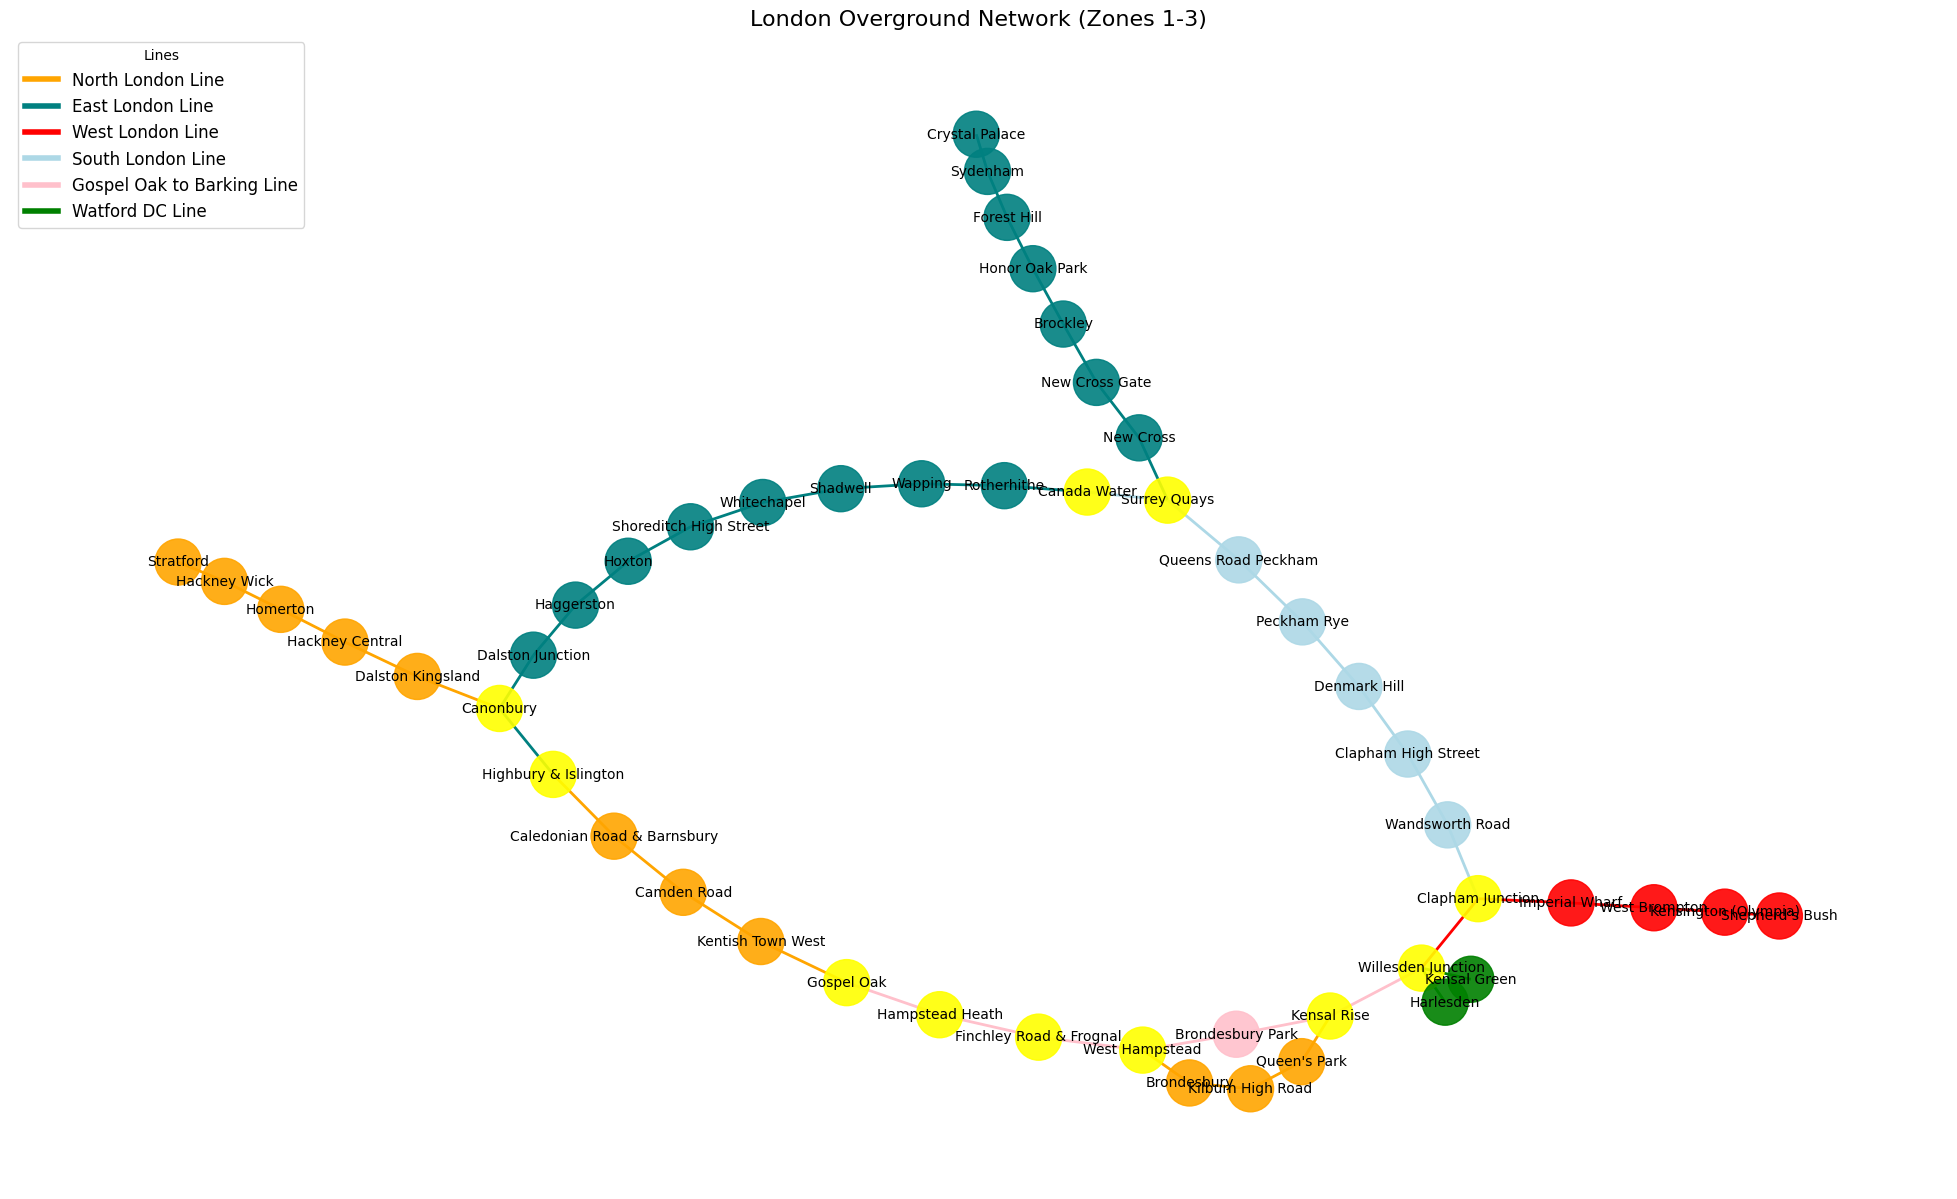

In [ ]:
# Visualize the graph
plt.figure(figsize=(25, 15))
pos = nx.spring_layout(G,seed=42, k=0.18, iterations=150)  # Position nodes using spring layout

# Define the legend elements based on the lines dictionary
legend_elements = [
    plt.Line2D([0], [0], color=properties["color"], lw=4, label=line)
    for line, properties in lines.items()
]
# Draw nodes
nx.draw_networkx_nodes(G, pos, node_color=node_colors, node_size=1100, alpha=0.9)

# Draw edges
nx.draw_networkx_edges(G, pos, edge_color=edge_colors, width=2)

# Draw labels
nx.draw_networkx_labels(G, pos, font_size=10, font_color="black")

# Title and legend
plt.title("London Overground Network (Zones 1-3)", fontsize=16)
# Add the legend to the plot
plt.legend(handles=legend_elements, loc="upper left", fontsize=12, title="Lines")
plt.axis("off")
plt.show()


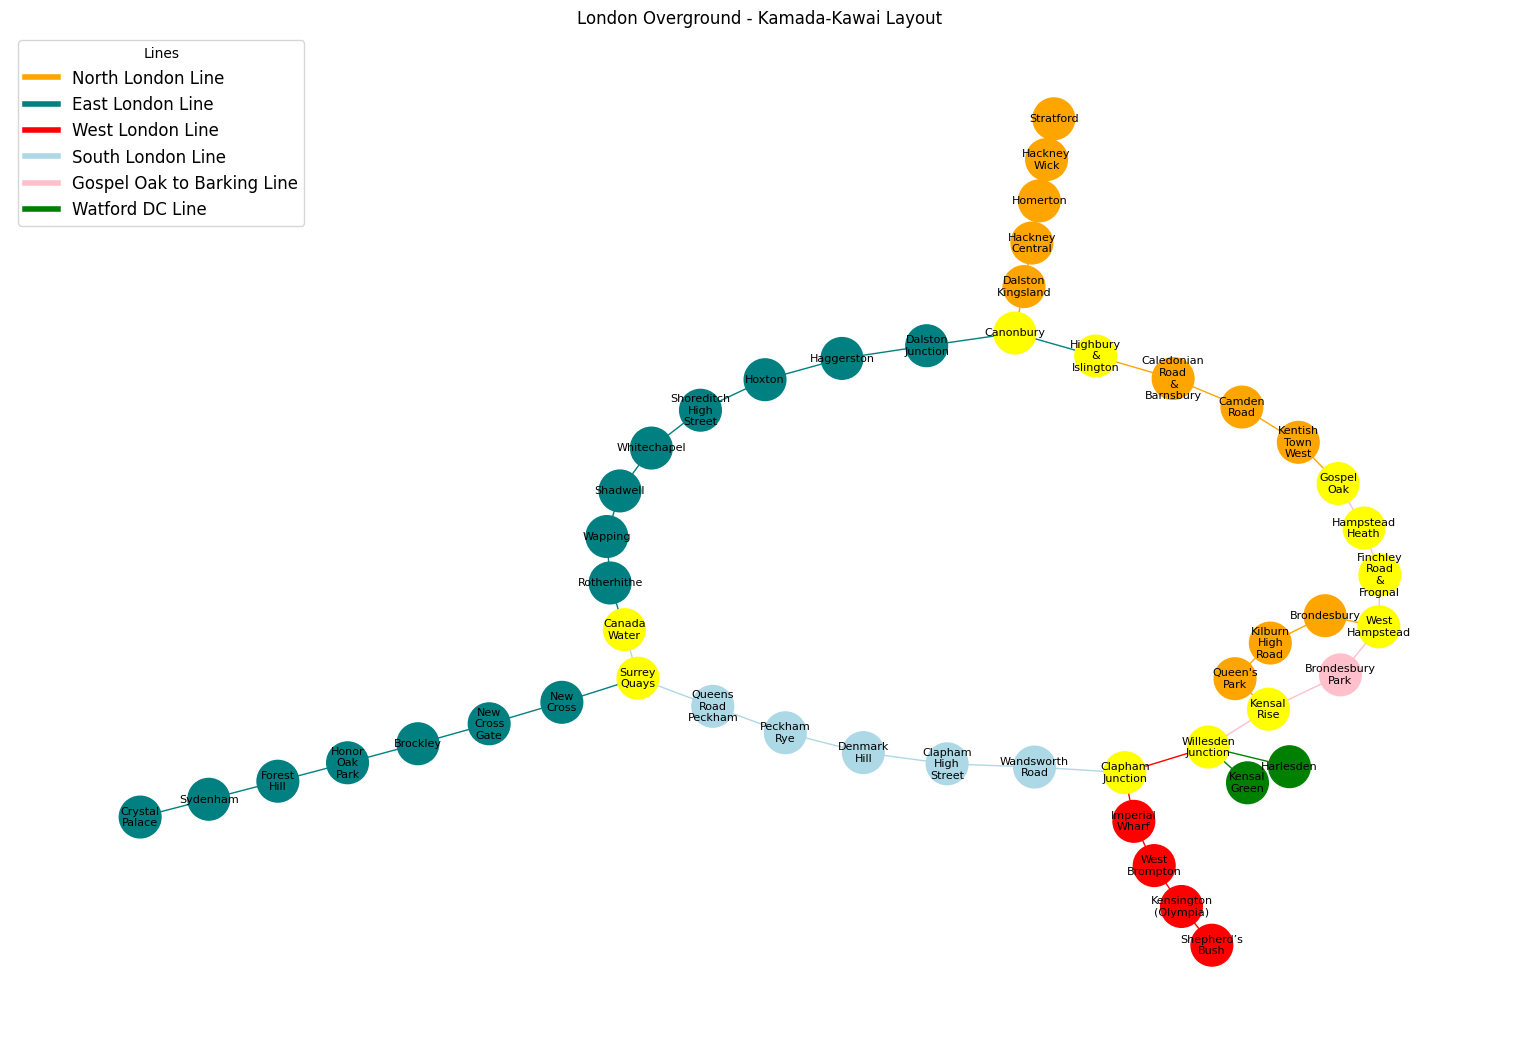

In [ ]:
# Kamada-Kawai Layout
pos = nx.kamada_kawai_layout(G, scale = 0.3)

# Define the legend elements based on the lines dictionary
legend_elements = [
    plt.Line2D([0], [0], color=properties["color"], lw=4, label=line)
    for line, properties in lines.items()
]

plt.figure(figsize=(15, 10))
nx.draw(G, pos, node_color=node_colors, edge_color=edge_colors, node_size=900, font_size=8)
# Prepare labels with vertical formatting (split words and add newline)
labels = {node: '\n'.join(node.split()) for node in G.nodes()}

# Draw labels with vertical alignment inside the nodes
nx.draw_networkx_labels(
    G,
    pos,
    labels=labels,
    font_size=8,
    verticalalignment="center",
    horizontalalignment="center",
    bbox=dict(facecolor="none", edgecolor="none", boxstyle="circle,pad=0.2")
)
plt.title("London Overground - Kamada-Kawai Layout")
# Add the legend to the plot
plt.legend(handles=legend_elements, loc="upper left", fontsize=12, title="Lines")
plt.axis("off")
plt.show()


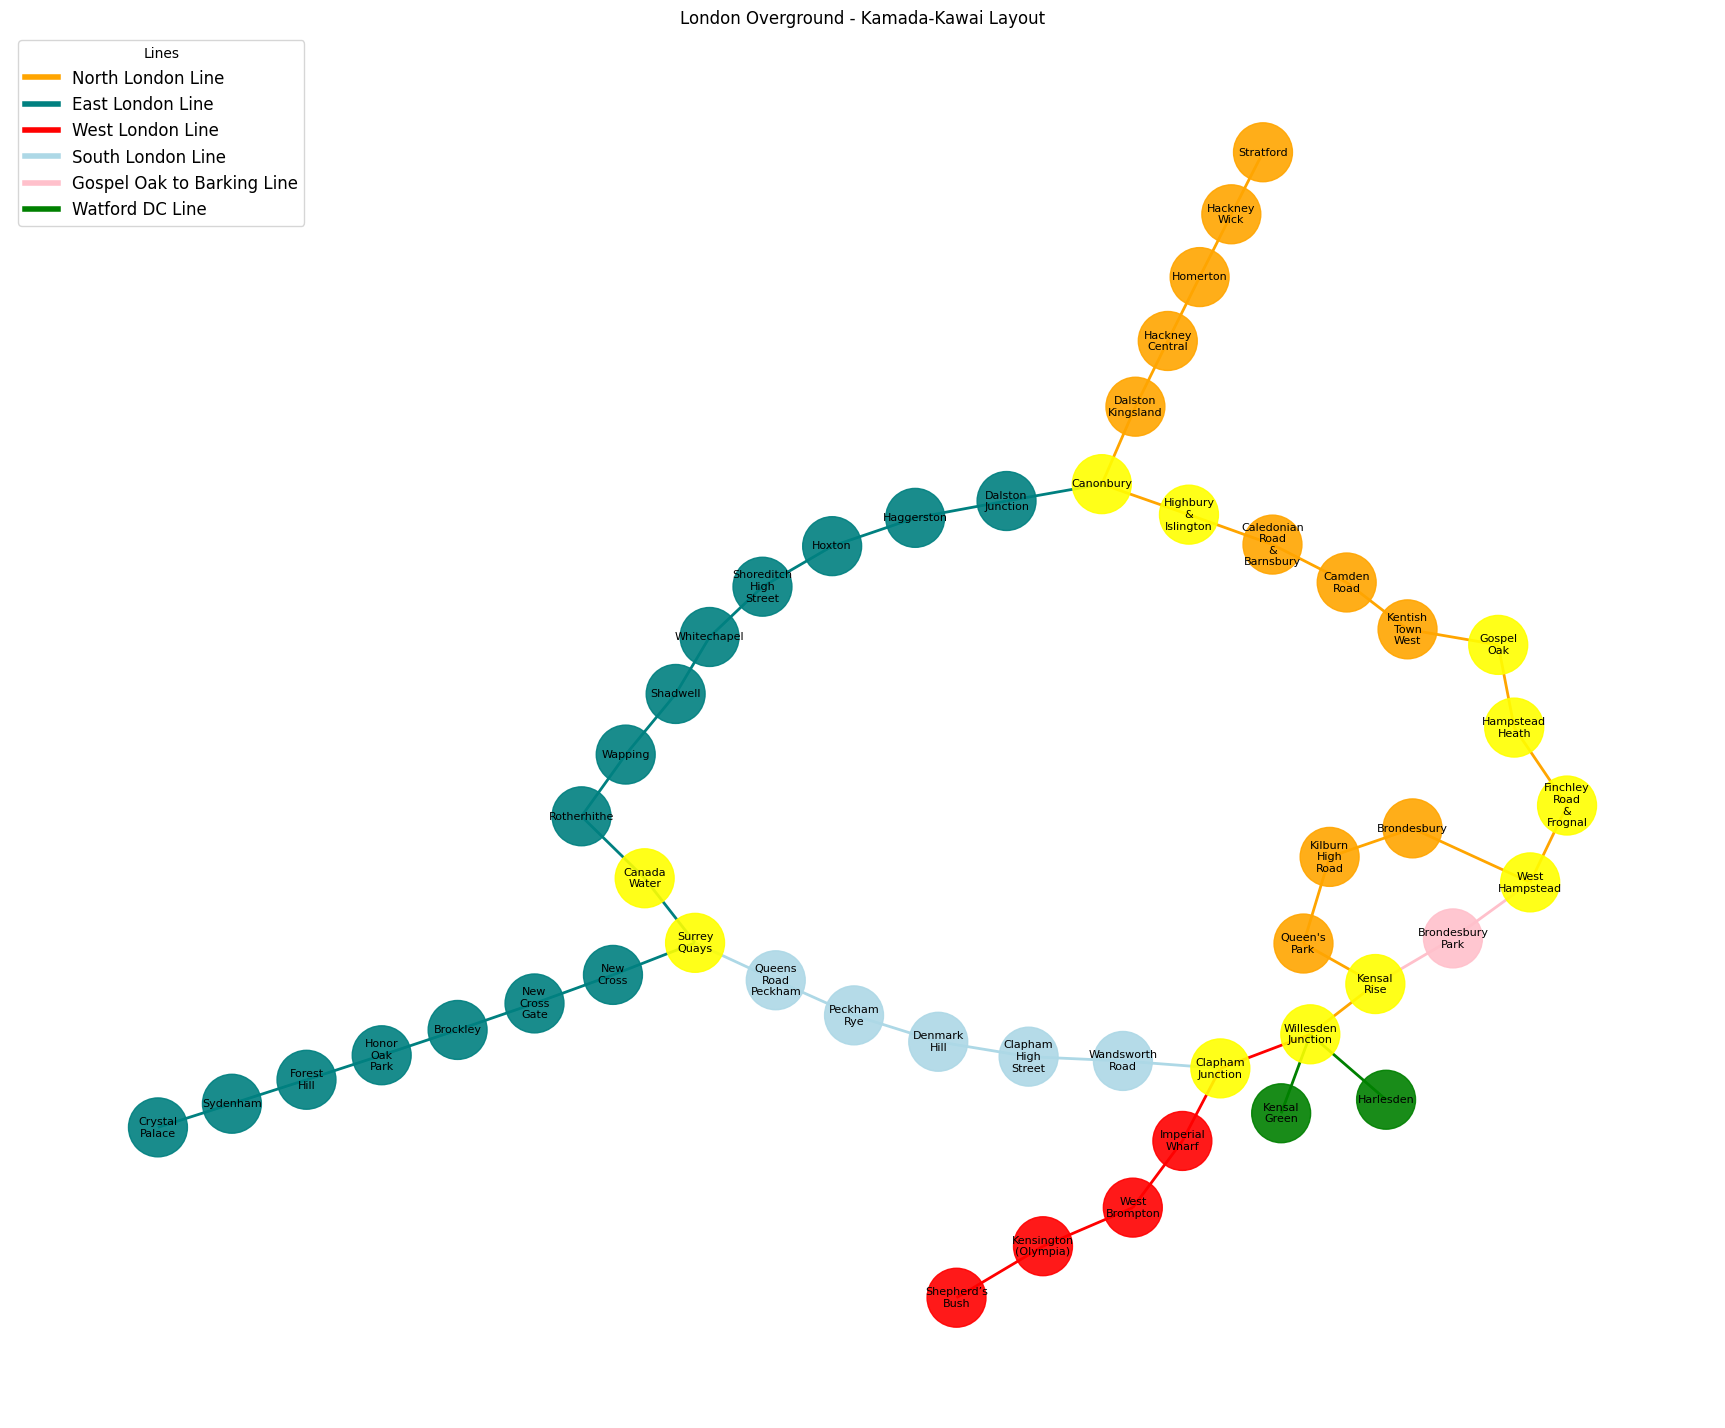

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Define the legend elements based on the lines dictionary
legend_elements = [
    plt.Line2D([0], [0], color=properties["color"], lw=4, label=line)
    for line, properties in lines.items()
]
# Kamada-Kawai layout with a larger scale to reduce overlaps
pos = nx.kamada_kawai_layout(G, scale=8)  # Increased scale for better spacing

# Manually adjust positions for highly overlapping nodes (optional, refine specific cases)
pos['Stratford'] = (pos['Stratford'][0] + 1.0, pos['Stratford'][1] + 0.6)
pos['Hackney Wick'] = (pos['Hackney Wick'][0] + 0.8, pos['Hackney Wick'][1] + 0.5)
pos['Homerton'] = (pos['Homerton'][0] + 0.6, pos['Homerton'][1] + 0.4)
pos['Hackney Central'] = (pos['Hackney Central'][0] + 0.4, pos['Hackney Central'][1] + 0.3)
pos['Dalston Kingsland'] = (pos['Dalston Kingsland'][0] + 0.2, pos['Dalston Kingsland'][1] + 0.2)

pos['Wapping'] = (pos['Wapping'][0] - 0.3, pos['Wapping'][1])
pos['Rotherhithe'] = (pos['Rotherhithe'][0] - 0.7, pos['Rotherhithe'][1])
pos['Canada Water'] = (pos['Canada Water'][0] - 0.3, pos['Canada Water'][1])

pos['Kilburn High Road'] = (pos['Kilburn High Road'][0] - 0.4, pos['Kilburn High Road'][1]+0.5)
pos['Queen\'s Park'] = (pos['Queen\'s Park'][0] - 0.3, pos['Queen\'s Park'][1])
pos['Brondesbury'] = (pos['Brondesbury'][0] - 0.2, pos['Brondesbury'][1]+0.4)

pos['Harlesden'] = (pos['Harlesden'][0] - 0.1, pos['Harlesden'][1] - 0.5)
pos['Kensal Green'] = (pos['Kensal Green'][0] - 0.6, pos['Kensal Green'][1] - 0.4)

pos['Finchley Road & Frognal'] = (pos['Finchley Road & Frognal'][0] + 0.6, pos['Finchley Road & Frognal'][1])
pos['West Hampstead'] = (pos['West Hampstead'][0] + 0.3, pos['West Hampstead'][1]-0.1)
pos['Hampstead Heath'] = (pos['Hampstead Heath'][0] + 0.3, pos['Hampstead Heath'][1]+0.2)
pos['Gospel Oak'] = (pos['Gospel Oak'][0] + 0.4, pos['Gospel Oak'][1]+0.5)

pos['Imperial Wharf'] = (pos['Imperial Wharf'][0] - 0.4, pos['Imperial Wharf'][1] - 0.1)
pos['West Brompton'] = (pos['West Brompton'][0] - 1.0, pos['West Brompton'][1]  - 0.2)
pos['Kensington (Olympia)'] = (pos['Kensington (Olympia)'][0] - 2.0, pos['Kensington (Olympia)'][1])
pos['Shepherd’s Bush'] = (pos['Shepherd’s Bush'][0] - 3.0, pos['Shepherd’s Bush'][1])

# Define node size and font size
node_size = 1800  # Keep nodes large for readability
font_size = 8     # Text should fit within nodes

# Create a larger figure size to reduce clustering
plt.figure(figsize=(22, 18))

# Draw nodes with custom size and color
node_color = [G.nodes[node]["color"] for node in G.nodes()]
nx.draw_networkx_nodes(G, pos, node_size=node_size, node_color=node_color, alpha=0.9)

# Draw edges
edge_color = [G.edges[edge].get("color", "black") for edge in G.edges()]
nx.draw_networkx_edges(G, pos, edge_color=edge_color, width=2)

# Prepare labels with vertical formatting (split words and add newline)
labels = {node: '\n'.join(node.split()) for node in G.nodes()}

# Draw labels with vertical alignment inside the nodes
nx.draw_networkx_labels(
    G,
    pos,
    labels=labels,
    font_size=font_size,
    verticalalignment="center",
    horizontalalignment="center",
    bbox=dict(facecolor="none", edgecolor="none", boxstyle="circle,pad=0.2")
)

plt.title("London Overground - Kamada-Kawai Layout")
# Add the legend to the plot
plt.legend(handles=legend_elements, loc="upper left", fontsize=12, title="Lines")
# Show the plot
plt.axis("off")  # Hide axes for cleaner visualization
plt.show()


**Set up and Display line attributes**

| **Station A**            | **Station B**                  | **Distance (km)** |
|--------------------------|-------------------------------|-------------------|
| Stratford               | Hackney Wick                  | 1.3               |
| Hackney Wick            | Homerton                      | 1.5               |
| Homerton                | Hackney Central               | 1.2               |
| Hackney Central         | Dalston Kingsland             | 1.7               |
| Dalston Kingsland       | Canonbury                     | 0.9               |
| Canonbury               | Highbury & Islington          | 1.1               |
| Highbury & Islington    | Caledonian Road & Barnsbury   | 1.3               |
| Caledonian Road & Barnsbury | Camden Road               | 1.5               |
| Camden Road             | Kentish Town West             | 1.4               |
| Kentish Town West       | Gospel Oak                    | 1.3               |
| Gospel Oak              | Hampstead Heath               | 1.5               |
| Hampstead Heath         | Finchley Road & Frognal       | 1.2               |
| Finchley Road & Frognal | West Hampstead                | 1.0               |
| West Hampstead          | Brondesbury                   | 1.1               |
| Brondesbury             | Kilburn High Road             | 0.9               |
| Kilburn High Road       | Queen's Park                  | 1.2               |
| Queen's Park            | Kensal Rise                   | 1.1               |
| Kensal Rise             | Willesden Junction            | 2.1               |
| Highbury & Islington    | Canonbury                     | 1.0               |
| Canonbury               | Dalston Junction              | 1.2               |
| Dalston Junction        | Haggerston                    | 1.0               |
| Haggerston              | Hoxton                        | 1.0               |
| Hoxton                  | Shoreditch High Street         | 0.8               |
| Shoreditch High Street  | Whitechapel                   | 1.2               |
| Whitechapel             | Shadwell                      | 1.0               |
| Shadwell                | Wapping                       | 0.8               |
| Wapping                 | Rotherhithe                   | 1.2               |
| Rotherhithe             | Canada Water                  | 1.0               |
| Canada Water            | Surrey Quays                  | 1.0               |
| Surrey Quays            | New Cross                     | 1.3               |
| New Cross               | New Cross Gate                | 0.6               |
| New Cross Gate          | Brockley                      | 1.5               |
| Brockley                | Honor Oak Park                | 1.3               |
| Honor Oak Park          | Forest Hill                   | 1.3               |
| Forest Hill             | Sydenham                      | 1.4               |
| Sydenham                | Crystal Palace                | 2.0               |
| Shepherd’s Bush         | Kensington (Olympia)          | 1.5               |
| Kensington (Olympia)    | West Brompton                 | 1.2               |
| West Brompton           | Imperial Wharf                | 1.3               |
| Imperial Wharf          | Clapham Junction              | 2.1               |
| Clapham Junction        | Willesden Junction            | 2.0               |
| Clapham Junction        | Wandsworth Road               | 1.0               |
| Wandsworth Road         | Clapham High Street           | 1.2               |
| Clapham High Street     | Denmark Hill                  | 1.4               |
| Denmark Hill            | Peckham Rye                   | 1.0               |
| Peckham Rye             | Queens Road Peckham           | 1.1               |
| Queens Road Peckham     | Surrey Quays                  | 1.2               |
| Kensal Green            | Willesden Junction            | 1.8               |
| Willesden Junction      | Harlesden                     | 1.3               |


In [ ]:
# Add edges with corrected distances (in km)
distances = {
    ('Stratford', 'Hackney Wick'): 1.3, ('Hackney Wick', 'Homerton'): 1.5,
    ('Homerton', 'Hackney Central'): 1.2, ('Hackney Central', 'Dalston Kingsland'): 1.7,
    ('Dalston Kingsland', 'Canonbury'): 0.9, ('Canonbury', 'Highbury & Islington'): 1.1,
    ('Highbury & Islington', 'Caledonian Road & Barnsbury'): 1.3,
    ('Caledonian Road & Barnsbury', 'Camden Road'): 1.5, ('Camden Road', 'Kentish Town West'): 1.4,
    ('Kentish Town West', 'Gospel Oak'): 1.3, ('Gospel Oak', 'Hampstead Heath'): 1.5,
    ('Hampstead Heath', 'Finchley Road & Frognal'): 1.2, ('Finchley Road & Frognal', 'West Hampstead'): 1.0,
    ('West Hampstead', 'Brondesbury'): 1.1, ('Brondesbury', 'Kilburn High Road'): 0.9,
    ('Kilburn High Road', 'Queen\'s Park'): 1.2, ('Queen\'s Park', 'Kensal Rise'): 1.1,
    ('Kensal Rise', 'Willesden Junction'): 2.1, ('Highbury & Islington', 'Canonbury'): 1.0,
    ('Canonbury', 'Dalston Junction'): 1.2, ('Dalston Junction', 'Haggerston'): 1.0,
    ('Haggerston', 'Hoxton'): 1.0, ('Hoxton', 'Shoreditch High Street'): 0.8,
    ('Shoreditch High Street', 'Whitechapel'): 1.2, ('Whitechapel', 'Shadwell'): 1.0,
    ('Shadwell', 'Wapping'): 0.8, ('Wapping', 'Rotherhithe'): 1.2, ('Rotherhithe', 'Canada Water'): 1.0,
    ('Canada Water', 'Surrey Quays'): 1.0, ('Surrey Quays', 'New Cross'): 1.3,
    ('New Cross', 'New Cross Gate'): 0.6, ('New Cross Gate', 'Brockley'): 1.5,
    ('Brockley', 'Honor Oak Park'): 1.3, ('Honor Oak Park', 'Forest Hill'): 1.3,
    ('Forest Hill', 'Sydenham'): 1.4, ('Sydenham', 'Crystal Palace'): 2.0,
    ('Shepherd’s Bush', 'Kensington (Olympia)'): 1.5, ('Kensington (Olympia)', 'West Brompton'): 1.2,
    ('West Brompton', 'Imperial Wharf'): 1.3, ('Imperial Wharf', 'Clapham Junction'): 2.1,
    ('Clapham Junction', 'Willesden Junction'): 2.0, ('Clapham Junction', 'Wandsworth Road'): 1.0,
    ('Wandsworth Road', 'Clapham High Street'): 1.2, ('Clapham High Street', 'Denmark Hill'): 1.4,
    ('Denmark Hill', 'Peckham Rye'): 1.0, ('Peckham Rye', 'Queens Road Peckham'): 1.1,
    ('Queens Road Peckham', 'Surrey Quays'): 1.2, ('Kensal Green', 'Willesden Junction'): 1.8,
    ('Willesden Junction', 'Harlesden'): 1.3
}



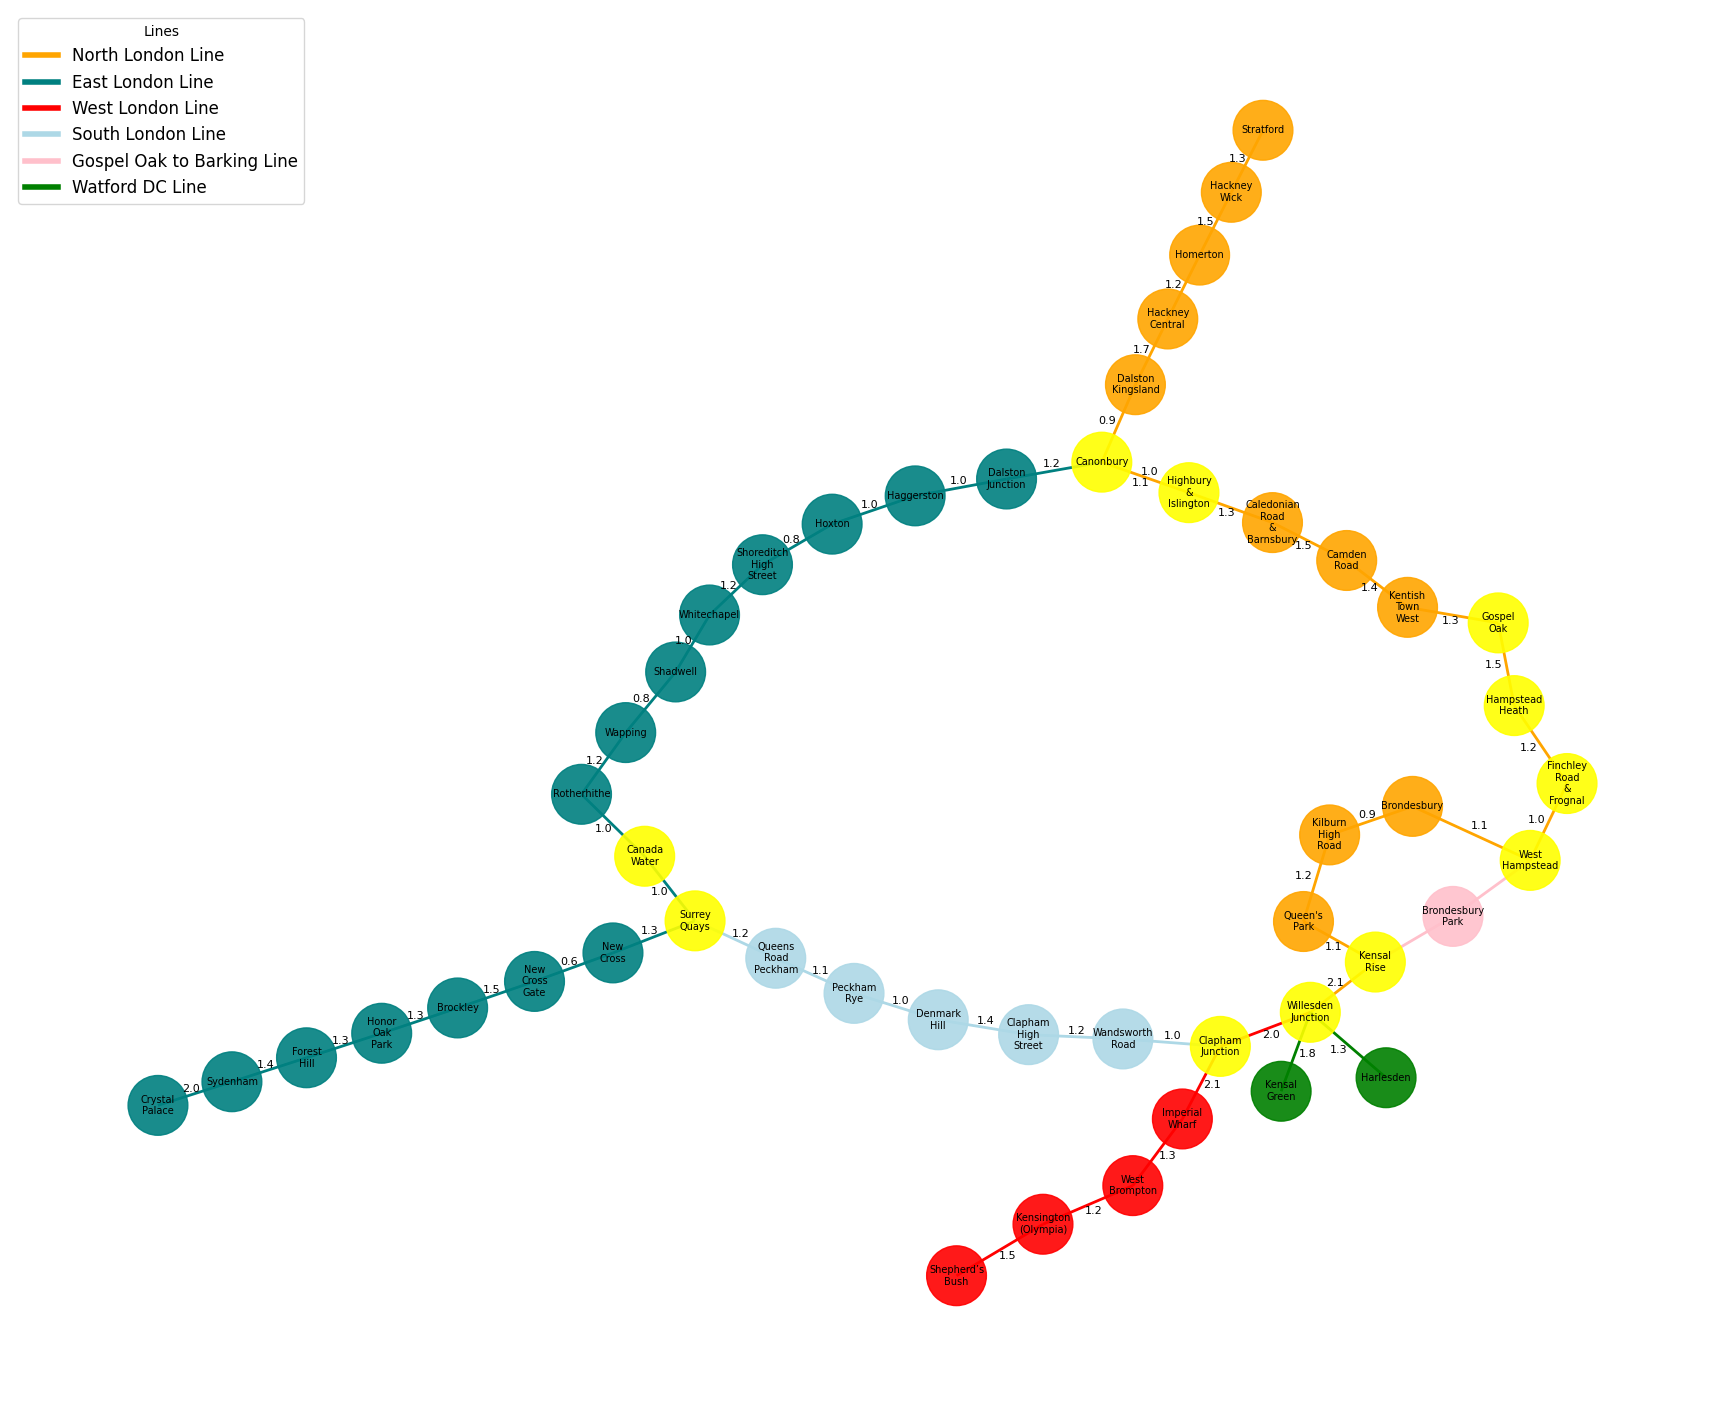

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Define the legend elements based on the lines dictionary
legend_elements = [
    plt.Line2D([0], [0], color=properties["color"], lw=4, label=line)
    for line, properties in lines.items()
]

# Add edges with distance and color from the 'lines' dictionary
for edge, distance in distances.items():
    # Get the color of the edge from the 'lines' dictionary (you can adjust this logic based on your data)
    # Find which line the edge belongs to and get the line color
    line_color = 'black'  # Default color in case the edge isn't found in 'lines' (this should not happen)
    for line, properties in lines.items():
        if edge[0] in properties['stations'] and edge[1] in properties['stations']:
            line_color = properties['color']
            break

    # Add the edge with the corresponding color and distance
    G.add_edge(*edge, distance=distance, color=line_color)

# Kamada-Kawai layout with a larger scale to reduce overlaps
pos = nx.kamada_kawai_layout(G, scale=8)  # Increased scale for better spacing

# Manually adjust positions for highly overlapping nodes (optional, refine specific cases)
pos['Stratford'] = (pos['Stratford'][0] + 1.0, pos['Stratford'][1] + 0.6)
pos['Hackney Wick'] = (pos['Hackney Wick'][0] + 0.8, pos['Hackney Wick'][1] + 0.5)
pos['Homerton'] = (pos['Homerton'][0] + 0.6, pos['Homerton'][1] + 0.4)
pos['Hackney Central'] = (pos['Hackney Central'][0] + 0.4, pos['Hackney Central'][1] + 0.3)
pos['Dalston Kingsland'] = (pos['Dalston Kingsland'][0] + 0.2, pos['Dalston Kingsland'][1] + 0.2)

pos['Wapping'] = (pos['Wapping'][0] - 0.3, pos['Wapping'][1])
pos['Rotherhithe'] = (pos['Rotherhithe'][0] - 0.7, pos['Rotherhithe'][1])
pos['Canada Water'] = (pos['Canada Water'][0] - 0.3, pos['Canada Water'][1])

pos['Kilburn High Road'] = (pos['Kilburn High Road'][0] - 0.4, pos['Kilburn High Road'][1]+0.5)
pos['Queen\'s Park'] = (pos['Queen\'s Park'][0] - 0.3, pos['Queen\'s Park'][1])
pos['Brondesbury'] = (pos['Brondesbury'][0] - 0.2, pos['Brondesbury'][1]+0.4)

pos['Harlesden'] = (pos['Harlesden'][0] - 0.1, pos['Harlesden'][1] - 0.5)
pos['Kensal Green'] = (pos['Kensal Green'][0] - 0.6, pos['Kensal Green'][1] - 0.4)

pos['Finchley Road & Frognal'] = (pos['Finchley Road & Frognal'][0] + 0.6, pos['Finchley Road & Frognal'][1])
pos['West Hampstead'] = (pos['West Hampstead'][0] + 0.3, pos['West Hampstead'][1]-0.1)
pos['Hampstead Heath'] = (pos['Hampstead Heath'][0] + 0.3, pos['Hampstead Heath'][1]+0.2)
pos['Gospel Oak'] = (pos['Gospel Oak'][0] + 0.4, pos['Gospel Oak'][1]+0.5)

pos['Imperial Wharf'] = (pos['Imperial Wharf'][0] - 0.4, pos['Imperial Wharf'][1] - 0.1)
pos['West Brompton'] = (pos['West Brompton'][0] - 1.0, pos['West Brompton'][1]  - 0.2)
pos['Kensington (Olympia)'] = (pos['Kensington (Olympia)'][0] - 2.0, pos['Kensington (Olympia)'][1])
pos['Shepherd’s Bush'] = (pos['Shepherd’s Bush'][0] - 3.0, pos['Shepherd’s Bush'][1])

# Define node size and font size
node_size = 1850  # Keep nodes large for readability
font_size = 7     # Text should fit within nodes

# Create a larger figure size to reduce clustering
plt.figure(figsize=(22, 18))

# Draw nodes with custom size and color
node_color = [G.nodes[node]["color"] for node in G.nodes()]
nx.draw_networkx_nodes(G, pos, node_size=node_size, node_color=node_color, alpha=0.9)

# Draw edges
edge_color = [G.edges[edge].get("color", "black") for edge in G.edges()]
nx.draw_networkx_edges(G, pos, edge_color=edge_color, width=2)

# Prepare labels with vertical formatting (split words and add newline)
labels = {node: '\n'.join(node.split()) for node in G.nodes()}

# Draw labels with vertical alignment inside the nodes
nx.draw_networkx_labels(
    G,
    pos,
    labels=labels,
    font_size=font_size,
    verticalalignment="center",
    horizontalalignment="center",
    bbox=dict(facecolor="none", edgecolor="none", boxstyle="circle,pad=0.2")
)

# Annotate edges with distances (without arrows)
for edge, distance in distances.items():
    x0, y0 = pos[edge[0]]
    x1, y1 = pos[edge[1]]

    # Place the annotation in the middle of the edge
    mid_x = (x0 + x1) / 2
    mid_y = (y0 + y1) / 2

    # Annotate with a small offset to avoid overlap with the edge
    offset_x = (y1 - y0) * 0.1  # Adjust the offset
    offset_y = (x0 - x1) * 0.1  # Adjust the offset

    # Plot distance as text without arrows
    plt.text(
        mid_x + offset_x,  # X-position of the annotation
        mid_y + offset_y,  # Y-position of the annotation
        f'{distance}',   # Text to display
        fontsize=8,         # Font size
        color='black',      # Text color
        #fontweight='bold',  # Text boldness
        ha='center',        # Horizontal alignment of the text
        va='center',        # Vertical alignment of the text
    )

# Add the legend to the plot
plt.legend(handles=legend_elements, loc="upper left", fontsize=12, title="Lines")


# Show the plot
plt.axis("off")  # Hide axes for cleaner visualization
plt.show()
